In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

# **Question 1**

In [5]:
# Differential Equation
def diffunc(x,y):
    return 1/(x**2 * (1-y))

## **Question 1.b**

In [6]:
# Euler Method
def euler(x0, y, h, x):
    # Iterating till x
    while x0 > x:
        y = y + h * diffunc(x0, y)
        x0 = x0 + h
    print("Approximate solution at x = ", x, " is ", "%.6f"% y)
 
euler(1, -1, -0.05, 0)
euler(1, -1, -0.05, 0.05)

Approximate solution at x =  0  is  -8.124934
Approximate solution at x =  0.05  is  -4.465853


## **Question 1.C**

In [10]:
# 4th-order Runge-Kutta
def runge_kutta(x0, y, h, x):
    # Iterate til x
    while x0 > x:
        k_1 = h * diffunc(x0,y)
        k_2 = h * diffunc(x0 + (1/2) * h, y + (1/2) * k_1)
        k_3 = h * diffunc(x0 + (1/2) * h, y + (1/2) * k_2)
        k_4 = h * diffunc(x0 + h, y + k_3)
        y = y + (1/6) * k_1 + (1/3) * k_2 + (1/3) * k_3 + (1/6) * k_4
        x0 = x0 + h
    print("Approximate solution at x = ", x, " is ", "%.6f"% y)

 
runge_kutta(1, -1, -0.05, 0)  
runge_kutta(1, -1, -0.05, 0.05)

Approximate solution at x =  0  is  -6071730441319061724688547840.000000
Approximate solution at x =  0.05  is  -5.500434


## **Question 1.d**

In [73]:
def inte(F,x,y,xStop,tol):
    def midpoint(F, x0, y0, xStop, nSteps):
        h = (xStop - x0) / nSteps
        x = x0
        y_prev = y0
        y_curr = y_prev + h * F(x, y_prev)
        for i in range(1, nSteps):
            x = x + h
            y_next = y_prev + 2.0 * h * F(x, y_curr)
            y_prev = y_curr
            y_curr = y_next
        x = x + h 
        y_end = 0.5 * (y_curr + y_prev + h * F(x, y_curr))
        return y_end

    def richardson(r, nSteps_list):
        k = len(r) - 1
        for j in range(k, 0, -1):
            factor = (nSteps_list[k] / nSteps_list[j - 1]) ** 2 - 1
            r[j - 1] = r[j] + (r[j] - r[j - 1]) / factor
        return
    # Maximum iteration
    kMax = 8
    #nSteps_list = [2 ** k for k in range(1, kMax + 1)] 
    # Substep size
    nSteps_list = [2*(k+1) for k in range(0, kMax)]
    r = []
    for nSteps in nSteps_list:
        y_mid = midpoint(F, x, y, xStop, nSteps)
        r.append(y_mid)
        if len(r) > 1:
            richardson(r, nSteps_list[:len(r)])
            error = abs(r[0] - r[1])
            if error < tol:
                return r[0]
    print("Warning: Maximum iterations reached without convergence.")
    return r[0]

def bulStoer(F, x, y, xStop, H, tol=1.0e-6):
    X = [x]
    Y = [y]
    while abs(x - xStop) > 1e-10:
        H_step = min(H, xStop - x) if x < xStop else max(H, xStop - x)
        y = inte(F, x, y, x + H_step, tol)
        x = x + H_step
        X.append(x)
        Y.append(y)
    return array(X), array(Y)
def F(x, y):
    return 1 / (x ** 2 * (1 - y))


x0 = 1
y0 = -1
xStop = 0.05
H = -0.05
tol = 1e-6

X, Y = bulStoer(F, x0, y0, xStop, H, tol)
print("Approximate solution at x =", xStop, "is", Y[-1])

Approximate solution at x = 0.05 is -5.48074058058637


# **Question 2**

In [7]:
def plot_3D(data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', s=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Point Cloud Data')
    plt.show()

def plot_2D(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.7, label="Projected Points")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("2D Projection")
    plt.legend()
    plt.grid(True)
    plt.show()

## **Empty Table**

### **Below are my first attempt, just perform PCA and plane fitting on dominant plane**

In [194]:
def PCA(data):
    # Normalize
    pc = data - np.mean(data, axis=0)
    # Covariance Matrix
    Q = np.dot(pc.T, pc) / (pc.shape[0] - 1)
    U, Sigma, Vt = np.linalg.svd(Q)
    # Eigenvectors & Eigenvalue
    eigenvectors = U
    eigenvalues = Sigma
    # Normal Vector of plane
    normal_vector = eigenvectors[:, np.argmin(eigenvalues)]
    # Principle Componenet
    largest_vector = eigenvectors[:, np.argmax(eigenvalues)]
    second_largest_vector = eigenvectors[:, np.argsort(eigenvalues)[-2]]
    principal_component = np.hstack((largest_vector[:, np.newaxis], second_largest_vector[:, np.newaxis]))
    return normal_vector, principal_component


def PlaneParam(normal_vector,data):
    '''
    Given a normal vector and data of a plane, return
    the parameter of the plane
    '''
    centorid = np.mean(data, axis=0)
    a, b, c = normal_vector
    d = - (a * centorid[0] + b * centorid[1] + c * centorid[2])
    return a, b, c, d


def PlaneProject(principle_component, data):
    '''
    Given a principle component of data, make projection
    of data into the plane of principle component
    '''
    return np.dot(data, principal_components)

Major Plane Parameter
a:0.08751468415007803
b:0.9631746638292203
c:0.2542356131929213
d:-0.3031026814273146


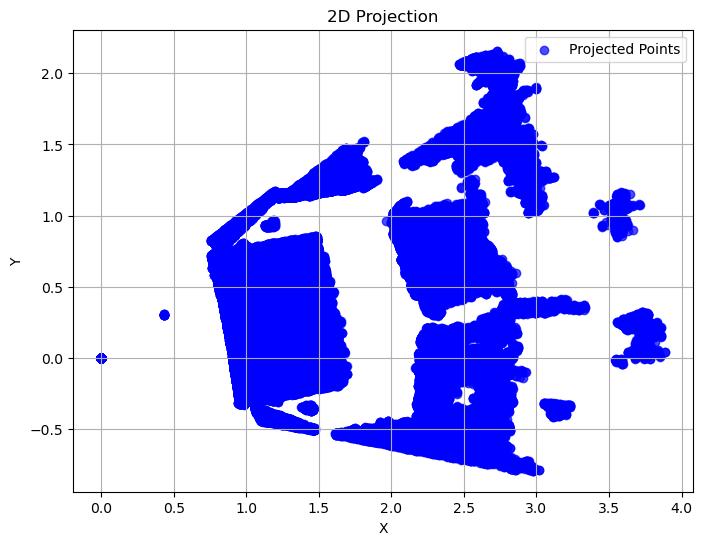

In [200]:
pc_raw = np.loadtxt('./Empty2-1.asc')
normal, principle = PCA(pc_raw)
a,b,c,d = PlaneParam(normal, pc_raw)
pc_project = PlaneProject(principle,pc_raw)
print('Major Plane Parameter')
print(f'a:{a}')
print(f'b:{b}')
print(f'c:{c}')
print(f'd:{d}')
plot_2D(pc_project)

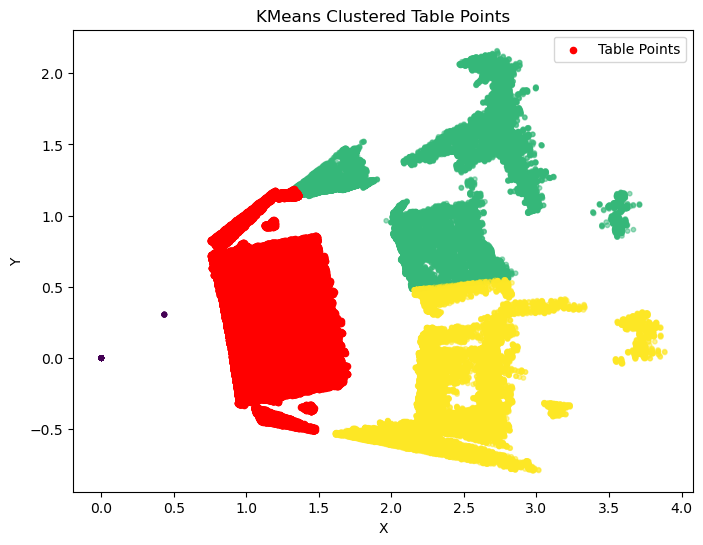

In [202]:
from sklearn.cluster import KMeans
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# I tried to use KMEAN to find table
labels = kmeans.fit_predict(pc_project)
label_counts = Counter(labels)
table_label = label_counts.most_common(1)[0][0]
table_points = pc_project[labels == table_label]
plt.figure(figsize=(8, 6))
plt.scatter(pc_project[:, 0], pc_project[:, 1], c=labels, cmap='viridis', marker='o', s=10, alpha=0.5)
plt.scatter(table_points[:, 0], table_points[:, 1], color='red', marker='o', s=20, label='Table Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KMeans Clustered Table Points")
plt.legend()
plt.show()

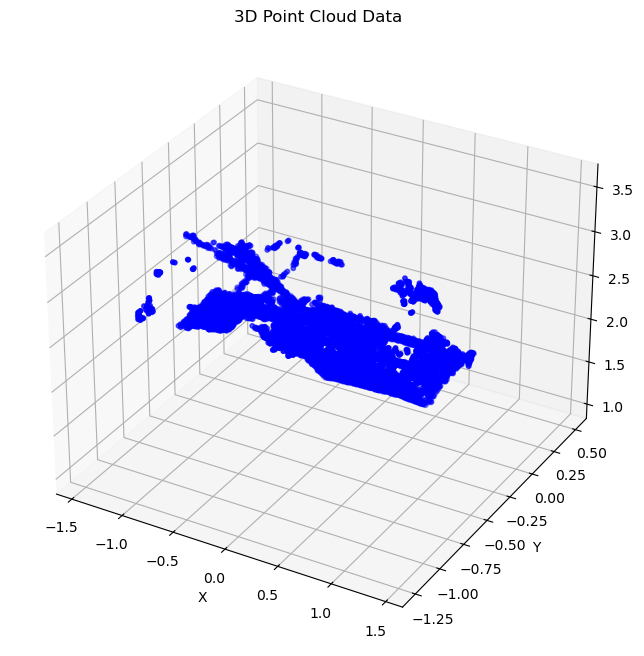

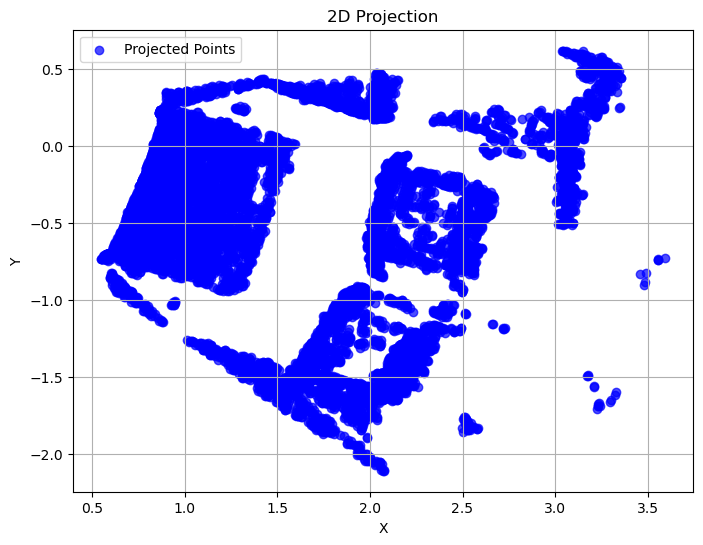

In [232]:
import numpy as np
from scipy.spatial import cKDTree


pc_raw = np.loadtxt('./Empty2-1.asc')
def voxel_downsample(data, voxel_size=0.02):
    """
    使用简单的体素下采样方法减少点云的噪声
    data: 点云数据，形状为 (n, 3)
    voxel_size: 网格的大小
    """
    coords = np.floor(data / voxel_size).astype(int)  # 将点划分到各个体素
    unique_coords, indices = np.unique(coords, axis=0, return_index=True)
    return data[indices]

# 使用示例
downsampled_data = voxel_downsample(pc_raw, voxel_size=0.02)
def statistical_outlier_removal(data, nb_neighbors=20, std_ratio=2.0):
    """
    基于局部密度的离群点去除方法
    data: 点云数据，形状为 (n, 3)
    nb_neighbors: 用于计算局部密度的邻居数
    std_ratio: 标准差阈值，超出此范围的点将被去除
    """
    tree = cKDTree(data)
    distances, _ = tree.query(data, k=nb_neighbors)
    mean_distances = np.mean(distances, axis=1)
    threshold = np.mean(mean_distances) + std_ratio * np.std(mean_distances)
    mask = mean_distances < threshold  # 距离较小的点保留
    return data[mask]



# 使用示例
filtered_data = statistical_outlier_removal(downsampled_data, nb_neighbors=10, std_ratio=0.05)

plot_3D(filtered_data)

# Normalize
pc = filtered_data - np.mean(filtered_data, axis=0)
# Covariance Matrix
Q = np.dot(pc.T, pc) / (pc.shape[0] - 1)
U, Sigma, Vt = np.linalg.svd(Q)
# Eigenvectors & Eigenvalue
eigenvectors = U
eigenvalues = Sigma
# Normal Vector of plane
normal_vector = eigenvectors[:, np.argmin(eigenvalues)]

# Plane Function with Centroid point
point_on_plane = np.mean(filtered_data, axis=0)
a, b, c = normal_vector
d = - (a * point_on_plane[0] + b * point_on_plane[1] + c * point_on_plane[2])
principal_components = eigenvectors[:, :2]
pc_project = np.dot(filtered_data, principal_components)
plot_2D(pc_project)

(3417, 3)


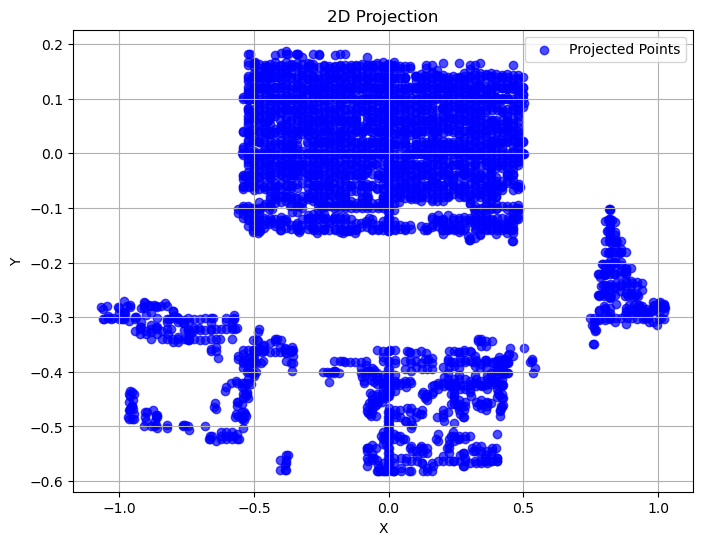

In [268]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler


# 迭代RANSAC检测多个平面
inliers_list = []
min_points_for_plane = 50  # 每个平面需要的最小点数
data = filtered_data.copy()

while len(data) > min_points_for_plane:
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # RANSAC平面拟合
    X = data_scaled[:, :2]
    y = data_scaled[:, 2]
    ransac = RANSACRegressor(residual_threshold=0.1, max_trials=1000)
    ransac.fit(X, y)

    # 提取内点和外点
    inlier_mask = ransac.inlier_mask_
    if np.sum(inlier_mask) < min_points_for_plane:
        break  # 如果平面内点不足，停止迭代

    inliers = data[inlier_mask]
    inliers_list.append(inliers)

    # 将内点从点云中移除
    data = data[~inlier_mask]
inliers = inliers_list[0]

print(inliers.shape)
pc = inliers - np.mean(inliers, axis=0)
# Covariance Matrix
Q = np.dot(pc.T, pc) / (pc.shape[0] - 1)
U, Sigma, Vt = np.linalg.svd(Q)
# Eigenvectors & Eigenvalue
eigenvectors = U
eigenvalues = Sigma
principal_components = eigenvectors[:, :2]
pc_project = np.dot(inliers, principal_components)
plot_2D(inliers)

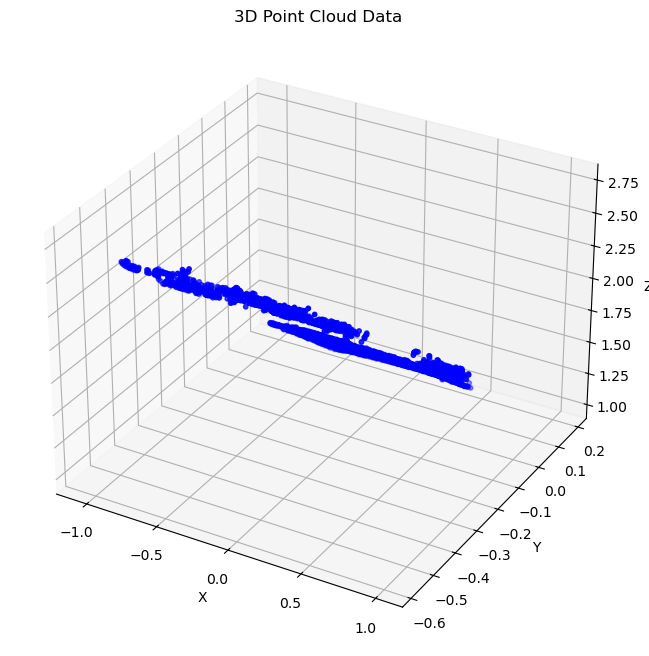

In [270]:
plot_3D(inliers)

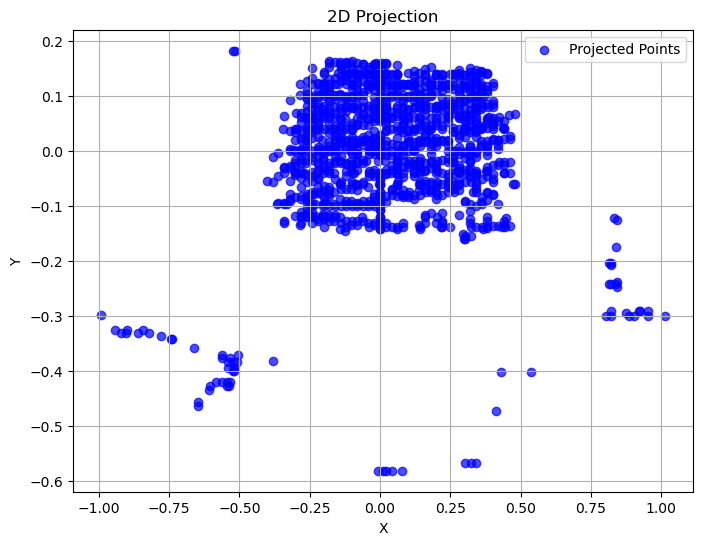

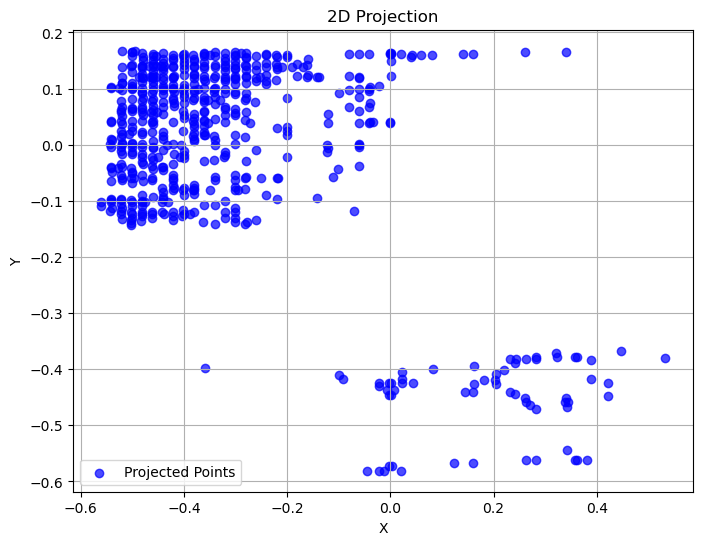

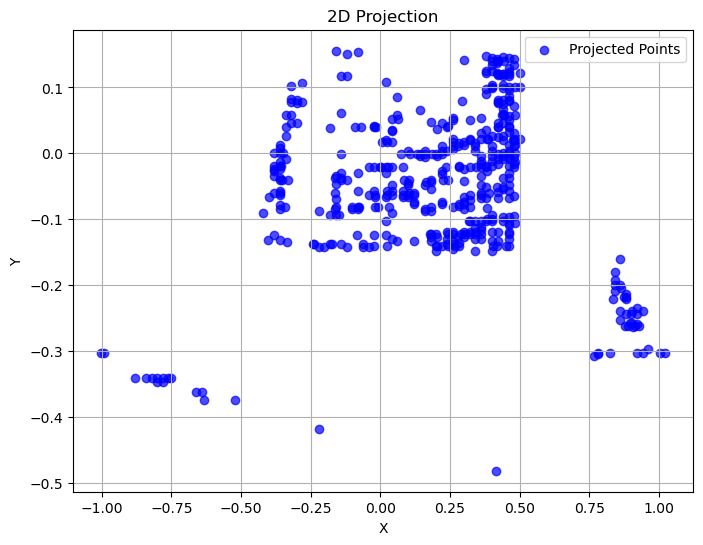

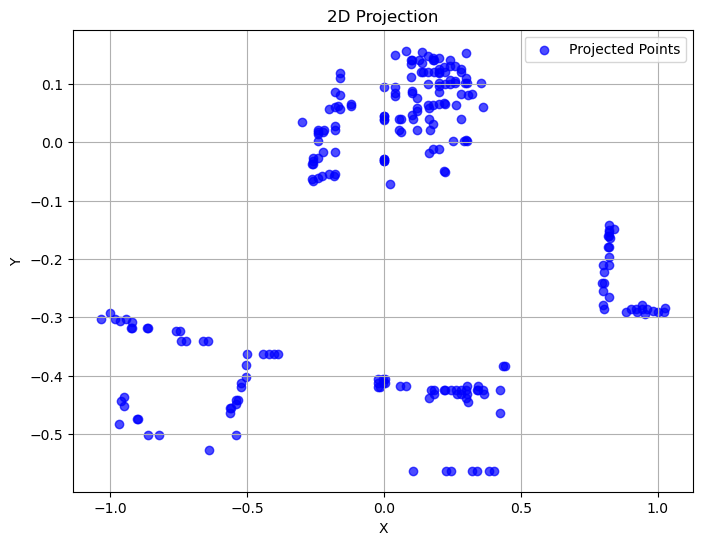

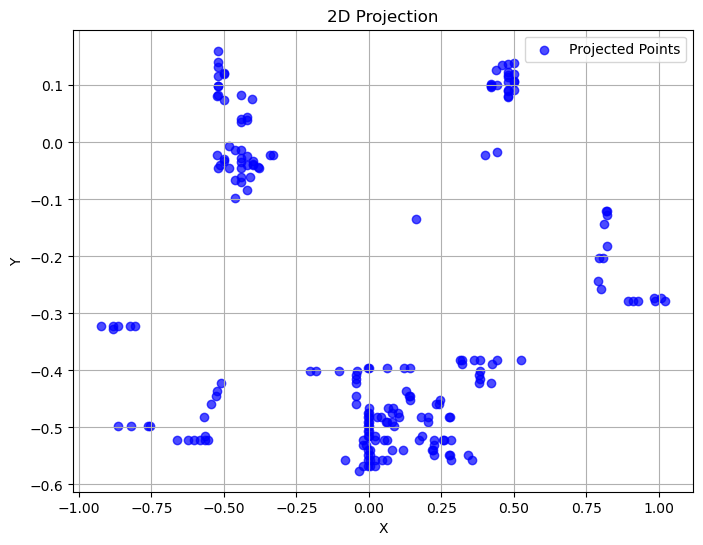

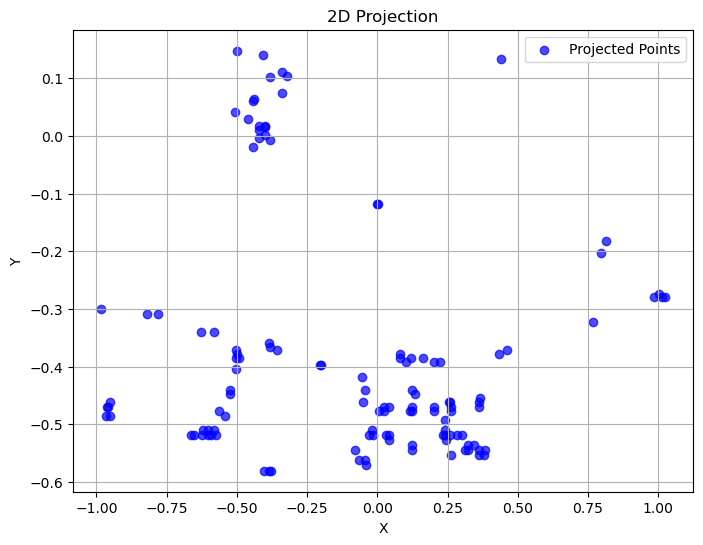

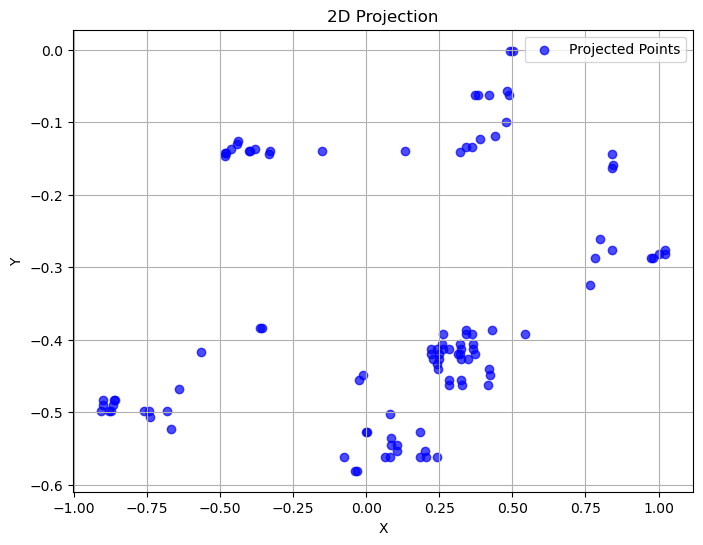

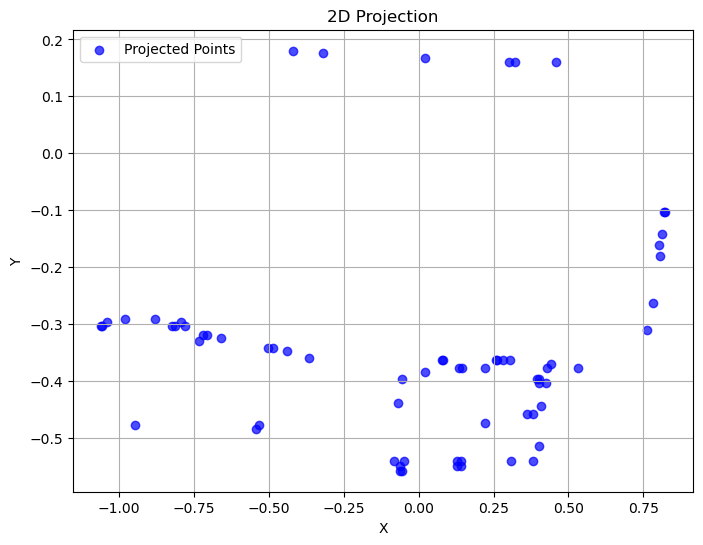

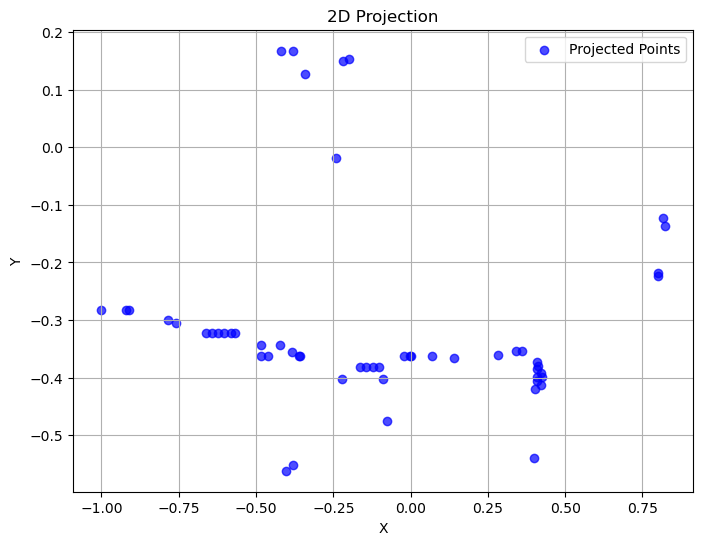

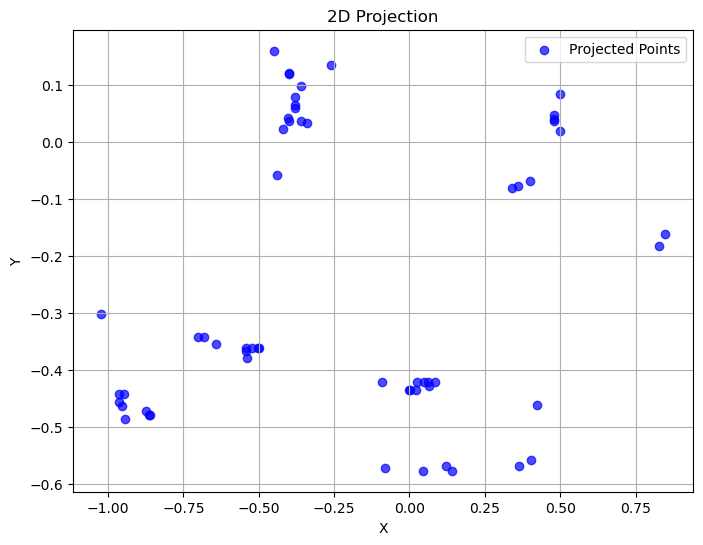

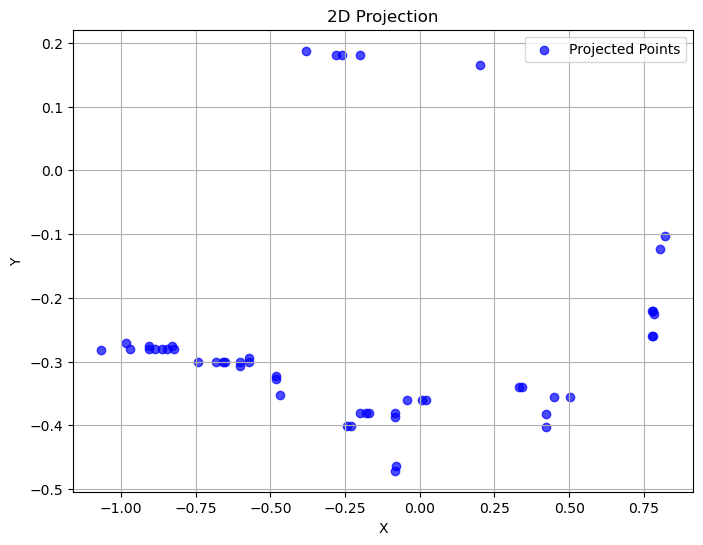

In [274]:
# 迭代RANSAC检测多个平面
inliers_list = []
min_points_for_plane = 50  # 每个平面需要的最小点数
data = inliers.copy()

while len(data) > min_points_for_plane:
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # RANSAC平面拟合
    X = data_scaled[:, :2]
    y = data_scaled[:, 2]
    ransac = RANSACRegressor(residual_threshold=0.01, max_trials=1000)
    ransac.fit(X, y)

    # 提取内点和外点
    inlier_mask = ransac.inlier_mask_
    if np.sum(inlier_mask) < min_points_for_plane:
        break  # 如果平面内点不足，停止迭代

    inliers = data[inlier_mask]
    inliers_list.append(inliers)

    # 将内点从点云中移除
    data = data[~inlier_mask]
for inliers in inliers_list:
    pc = inliers - np.mean(inliers, axis=0)
    # Covariance Matrix
    Q = np.dot(pc.T, pc) / (pc.shape[0] - 1)
    U, Sigma, Vt = np.linalg.svd(Q)
    # Eigenvectors & Eigenvalue
    eigenvectors = U
    eigenvalues = Sigma
    principal_components = eigenvectors[:, :2]
    pc_project = np.dot(inliers, principal_components)
    plot_2D(inliers)